# Project Name : UCI Credit Card Default

# Created By: Akarsh Srivastava

# Date: 10-09-2021



Dataset This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005. Content There are 25 variables:

    
ID: ID of each client
LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
SEX: Gender (1=male, 2=female)
EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
MARRIAGE: Marital status (1=married, 2=single, 3=others)
AGE: Age in years
PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)
PAY_2: Repayment status in August, 2005 (scale same as above)
PAY_3: Repayment status in July, 2005 (scale same as above)
PAY_4: Repayment status in June, 2005 (scale same as above)
PAY_5: Repayment status in May, 2005 (scale same as above)
PAY_6: Repayment status in April, 2005 (scale same as above)
BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
default.payment.next.month: Default payment (1=yes, 0=no)

In [2]:
#Import Data Manipulation and ML Algorithm Libarries
import numpy as np
import pandas as pd
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from scipy import stats

In [3]:
#import the visulization library


import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from scipy import stats

In [5]:
#import the dataset
import os
print(os.getcwd())
os.chdir(r'D:\Skillslash\Projects\Project 1')

C:\Users\Akarsh Srivastava\Downloads


In [6]:
credit_card=pd.read_csv('UCI_Credit_Card.csv')

In [7]:
credit_card

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [6]:
credit_card.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


we can see that the repayment status is indicated in columns PAY_0, PAY_2 ... with no PAY_1 column, so we rename PAY_0 to PAY_1 for ease of understanding.      
                                default.payment.next.month as def_pay

In [7]:
credit_card=credit_card.drop(['ID'], axis=1)

In [8]:
credit_card

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,1,3,1,39,0,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,150000.0,1,3,2,43,-1,-1,-1,-1,0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,30000.0,1,2,2,37,4,3,2,-1,0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,80000.0,1,3,1,41,1,-1,0,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [9]:
credit_card.rename(columns={'default.payment.next.month':'def_pay'}, inplace=True)
credit_card.rename(columns={'PAY_0':'PAY_1'}, inplace=True)

In [10]:
credit_card.head().transpose()

,0,1,2,3,4
LIMIT_BAL,20000.0,120000.0,90000.0,50000.0,50000.0
SEX,2.0,2.0,2.0,2.0,1.0
EDUCATION,2.0,2.0,2.0,2.0,2.0
MARRIAGE,1.0,2.0,2.0,1.0,1.0
AGE,24.0,26.0,34.0,37.0,57.0
PAY_1,2.0,-1.0,0.0,0.0,-1.0
PAY_2,2.0,2.0,0.0,0.0,0.0
PAY_3,-1.0,0.0,0.0,0.0,-1.0
PAY_4,-1.0,0.0,0.0,0.0,0.0
PAY_5,-2.0,0.0,0.0,0.0,0.0


# DATA Exploration

In [11]:
credit_card.isnull().sum()

LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_1        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
def_pay      0
dtype: int64

# NO Missing Value in the dataset

In [12]:
credit_card.dtypes

LIMIT_BAL    float64
SEX            int64
EDUCATION      int64
MARRIAGE       int64
AGE            int64
PAY_1          int64
PAY_2          int64
PAY_3          int64
PAY_4          int64
PAY_5          int64
PAY_6          int64
BILL_AMT1    float64
BILL_AMT2    float64
BILL_AMT3    float64
BILL_AMT4    float64
BILL_AMT5    float64
BILL_AMT6    float64
PAY_AMT1     float64
PAY_AMT2     float64
PAY_AMT3     float64
PAY_AMT4     float64
PAY_AMT5     float64
PAY_AMT6     float64
def_pay        int64
dtype: object

# No object type datatype in dataset





def_pay  is a flag that indicates whether the clients will default or not under next month payment,   1= Default   0= Not Default(otherwise)

In [13]:
credit_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LIMIT_BAL  30000 non-null  float64
 1   SEX        30000 non-null  int64  
 2   EDUCATION  30000 non-null  int64  
 3   MARRIAGE   30000 non-null  int64  
 4   AGE        30000 non-null  int64  
 5   PAY_1      30000 non-null  int64  
 6   PAY_2      30000 non-null  int64  
 7   PAY_3      30000 non-null  int64  
 8   PAY_4      30000 non-null  int64  
 9   PAY_5      30000 non-null  int64  
 10  PAY_6      30000 non-null  int64  
 11  BILL_AMT1  30000 non-null  float64
 12  BILL_AMT2  30000 non-null  float64
 13  BILL_AMT3  30000 non-null  float64
 14  BILL_AMT4  30000 non-null  float64
 15  BILL_AMT5  30000 non-null  float64
 16  BILL_AMT6  30000 non-null  float64
 17  PAY_AMT1   30000 non-null  float64
 18  PAY_AMT2   30000 non-null  float64
 19  PAY_AMT3   30000 non-null  float64
 20  PAY_AM

In [14]:
credit_card.describe().T

,count,mean,std,min,25%,50%,75%,max
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_1,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0
PAY_5,30000.0,-0.266200,1.133187,-2.0,-1.00,0.0,0.00,8.0


The average value for the amount of credit card limit is 167,484 NT dollars. The standard deviation is 129,747 NT dollars, ranging from 10,000 to 1M NT dollars.
Education level is mostly graduate school (1) and university (2). Most of the clients are either marrined or single (less frequent the other status). Average age is 35.5 years, with a standard deviation of 9.2 years.

In [15]:
credit_card[['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].describe()

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100
std,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


they all present an undocumented label -2. If 1,2,3, etc are the months of delay, 0 should be labeled 'pay duly' and every negative value should be seen as a 0. But we will get to that later.

In [16]:
for cols in credit_card:
    credit_card[cols].replace({-2:0,-1:0},inplace=True)

In [17]:
credit_card[['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].describe()

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000
mean,0.356767,0.320033,0.304067,0.258767,0.22150,0.226567
std,0.760594,0.801727,0.790589,0.761113,0.71772,0.715438
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.00000,8.000000


In [18]:
# Bill Statement description
credit_card[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000
mean,51223.332567,49179.077167,4.701316e+04,43262.951333,40311.402633,38871.762767
std,73635.859416,71173.767401,6.934939e+04,64332.854542,60797.154665,59554.105992
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000
25%,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000
50%,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000
75%,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


Negative bill amount??? need to look in this

In [19]:
#Previous Payment Description
credit_card[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].describe()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


In [20]:
credit_card.LIMIT_BAL.describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

In [21]:
def outliers_iqr(ys):
    quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    return np.where((ys > upper_bound) | (ys < lower_bound))

In [22]:
credit_card.loc[outliers_iqr(credit_card["BILL_AMT3"])]

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
6,500000.0,1,1,2,29,0,0,0,0,0,...,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0
17,320000.0,1,1,1,49,0,0,0,0,0,...,70074.0,5856.0,195599.0,10358.0,10000.0,75940.0,20000.0,195599.0,50000.0,0
36,280000.0,1,2,1,40,0,0,0,0,0,...,170410.0,173901.0,177413.0,8026.0,8060.0,6300.0,6400.0,6400.0,6737.0,0
40,360000.0,1,1,2,33,0,0,0,0,0,...,628699.0,195969.0,179224.0,10000.0,7000.0,6000.0,188840.0,28000.0,4000.0,0
57,180000.0,2,2,1,34,0,0,0,0,0,...,168608.0,132202.0,129918.0,8083.0,7296.0,5253.0,4814.0,4816.0,3800.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29957,500000.0,1,2,2,31,0,0,0,0,0,...,278725.0,89161.0,87863.0,6025.0,294318.0,10254.0,7524.0,5009.0,2333.0,0
29963,610000.0,1,1,2,31,0,0,2,0,0,...,347303.0,248893.0,269528.0,323014.0,1605.0,349395.0,250144.0,271099.0,220076.0,0
29978,310000.0,1,2,1,39,0,0,0,0,0,...,219409.0,216540.0,210675.0,10029.0,9218.0,10029.0,8049.0,8040.0,10059.0,0
29988,250000.0,1,1,1,34,0,0,0,0,0,...,245750.0,175005.0,179687.0,65000.0,8800.0,9011.0,6000.0,7000.0,6009.0,0


In [23]:
from collections import Counter

def detect_outliers(df,features):
    outlier_indices = []
    
    for c in features:
        #1st quartile
        Q1 = np.percentile(credit_card[c],25)
        #3rd quartile
        Q3 = np.percentile(credit_card[c],75)
        #IQR
        IQR = Q3-Q1
        #Outlier Step
        outlier_step= IQR * 1.5
        #Detect outlier and their indices
        outlier_list_col = credit_card[(credit_card[c]<Q1 - outlier_step) | (credit_card[c]> Q3 + outlier_step)].index
        #store indices
        outlier_indices.extend(outlier_list_col)
        
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i,v in outlier_indices.items() if v > 2)
    
    return multiple_outliers
    

In [24]:
credit_card.loc[detect_outliers(credit_card,['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6'])]

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
6,500000.0,1,1,2,29,0,0,0,0,0,...,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0
17,320000.0,1,1,1,49,0,0,0,0,0,...,70074.0,5856.0,195599.0,10358.0,10000.0,75940.0,20000.0,195599.0,50000.0,0
36,280000.0,1,2,1,40,0,0,0,0,0,...,170410.0,173901.0,177413.0,8026.0,8060.0,6300.0,6400.0,6400.0,6737.0,0
40,360000.0,1,1,2,33,0,0,0,0,0,...,628699.0,195969.0,179224.0,10000.0,7000.0,6000.0,188840.0,28000.0,4000.0,0
57,180000.0,2,2,1,34,0,0,0,0,0,...,168608.0,132202.0,129918.0,8083.0,7296.0,5253.0,4814.0,4816.0,3800.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29479,140000.0,1,1,2,33,0,0,0,0,0,...,136481.0,135012.0,133324.0,7000.0,7000.0,7000.0,5500.0,6000.0,4624.0,0
29548,220000.0,1,1,2,31,0,0,2,2,2,...,151588.0,147656.0,157276.0,12000.0,0.0,27500.0,0.0,12000.0,0.0,1
29801,260000.0,1,1,2,33,2,2,2,2,2,...,142480.0,145630.0,150147.0,7000.0,0.0,18000.0,7000.0,7000.0,5500.0,0
29965,140000.0,1,2,1,32,0,0,0,0,0,...,137450.0,135638.0,136375.0,6300.0,6500.0,6300.0,6000.0,5200.0,5000.0,0


In [25]:
credit_card.def_pay.sum() / len(credit_card.def_pay)

0.2212

<AxesSubplot:xlabel='def_pay', ylabel='count'>

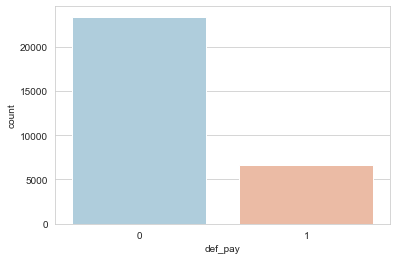

In [26]:
sns.set_style('whitegrid')
sns.countplot(x='def_pay',data=credit_card,palette='RdBu_r')

So its a problem of class imbalance 

In [27]:
credit_card.SEX.value_counts() # SEX,MARRIAGE,EDUCATION

2    18112
1    11888
Name: SEX, dtype: int64

In [28]:
credit_card[["SEX","def_pay"]].groupby(["SEX"], as_index = False).mean().sort_values(by="def_pay",ascending=False)

,SEX,def_pay
0,1,0.241672
1,2,0.207763


In [29]:
credit_card[["MARRIAGE","def_pay"]].groupby(["MARRIAGE"], as_index = False).mean().sort_values(by="def_pay",ascending=False)

,MARRIAGE,def_pay
3,3,0.260062
1,1,0.234717
2,2,0.209283
0,0,0.092593


In [30]:
credit_card.def_pay.value_counts()

0    23364
1     6636
Name: def_pay, dtype: int64

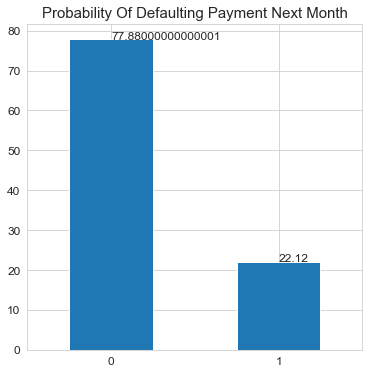

In [31]:
def_cnt = (credit_card.def_pay.value_counts(normalize=True)*100)
def_cnt.plot.bar(figsize=(6,6))
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12)
plt.title("Probability Of Defaulting Payment Next Month", fontsize=15)
for x,y in zip([0,1],def_cnt):
    plt.text(x,y,y,fontsize=12)
plt.show()

We can see that the dataset consists of 78% clients are not expected to default payment whereas 23% clients are expected to default the payment.

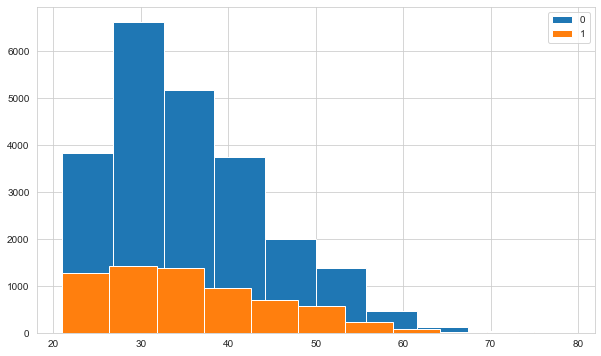

In [32]:
plt.figure(figsize=(10,6))
credit_card.groupby('def_pay')['AGE'].hist(legend=True)
plt.show()

we can see that, between age 20 to 45 most of the people will fall into

In [33]:
# percentage default rate accorss feature categories( age, gender etc)

In [34]:
credit_card['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

<AxesSubplot:>

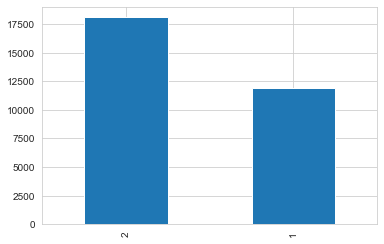

In [35]:
credit_card['SEX'].value_counts().plot.bar()

Its shows that male credit card holder are less then females

In [36]:
credit_card['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

<AxesSubplot:>

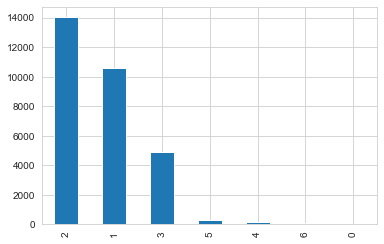

In [37]:
credit_card['EDUCATION'].value_counts().plot.bar()

It looks like most of the client's education level belongs to category 2,1 and 3.

In [38]:
credit_card['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

<AxesSubplot:>

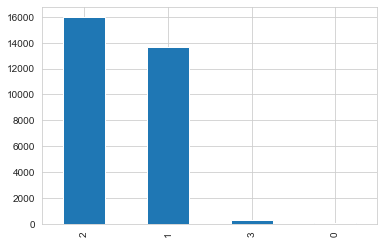

In [39]:
credit_card['MARRIAGE'].value_counts().plot.bar()

We noticed that there is very less number of values for category 3 and 0.

In [40]:
credit_card['EDUCATION']=credit_card['EDUCATION'].map({0:4,1:1,2:2,3:3,4:4,5:4,6:4})

credit_card['MARRIAGE']=credit_card['MARRIAGE'].map({0:3,1:1,2:2,3:3})

In [41]:

credit_card['MARRIAGE'].value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

In [42]:
credit_card['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

since we have marriage and education columns so we have to do one hot encoding as it will give respective columns and not give priorities

In [43]:
credit_card.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
0,20000.0,2,2,1,24,2,2,0,0,0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,0,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,0,0,0,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


<AxesSubplot:xlabel='SEX', ylabel='count'>

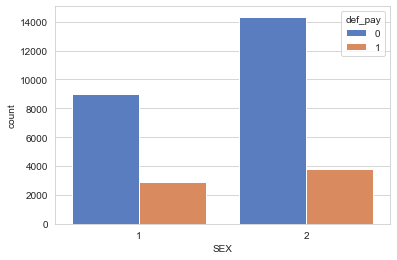

In [44]:
sns.countplot(x='SEX', data=credit_card,hue="def_pay", palette="muted")

For females, the count of default.payment.next.month = 1 is highter than males

C:\Users\Akarsh Srivastava\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Age Distribution')

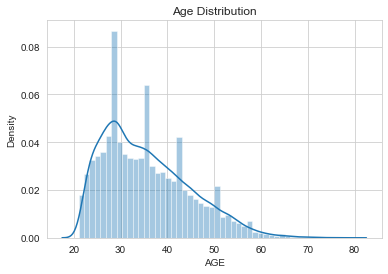

In [45]:
sns.distplot(credit_card['AGE'])
plt.title('Age Distribution')

From this distribution we can see the distribution  is right skewed, so we have to check for outlier

C:\Users\Akarsh Srivastava\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='def_pay', ylabel='AGE'>

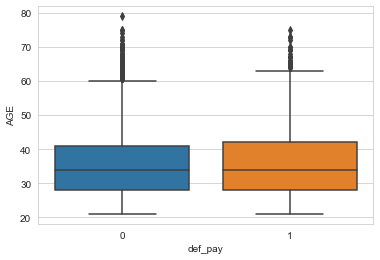

In [46]:
sns.boxplot('def_pay','AGE',data=credit_card)

C:\Users\Akarsh Srivastava\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='def_pay', ylabel='LIMIT_BAL'>

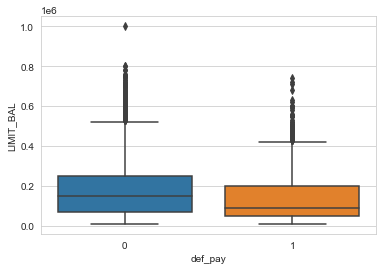

In [47]:
sns.boxplot('def_pay','LIMIT_BAL',data=credit_card)

In [48]:
def draw_histograms(credit_card, variables, n_rows, n_cols, n_bins):
    fig=plt.figure()
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        credit_card[var_name].hist(bins=n_bins,ax=ax)
        ax.set_title(var_name)
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()

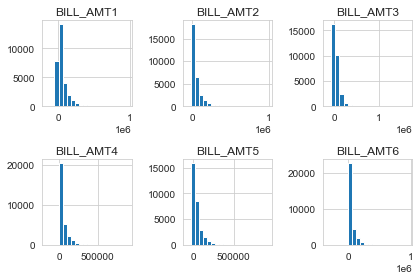

In [49]:
bills = credit_card[['BILL_AMT1','BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']]
draw_histograms(bills, bills.columns, 2, 3, 20)

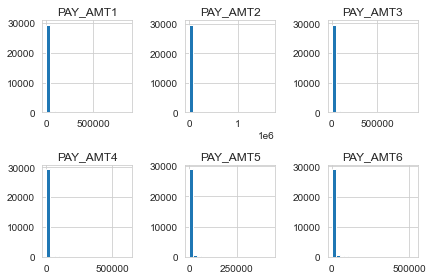

In [50]:
pay = credit_card[['PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]
draw_histograms(pay, pay.columns, 2, 3, 20)

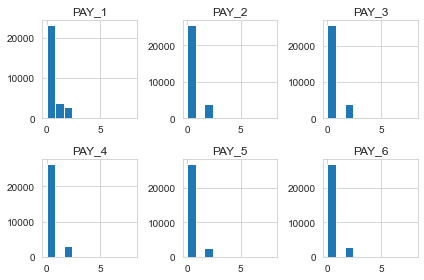

In [51]:
late = credit_card[['PAY_1','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]
draw_histograms(late, late.columns, 2, 3, 10)


<AxesSubplot:>

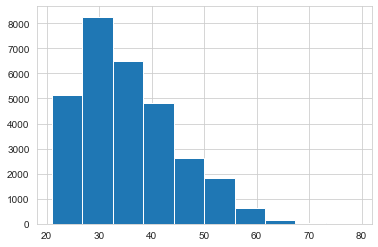

In [52]:
credit_card.AGE.hist()

<AxesSubplot:>

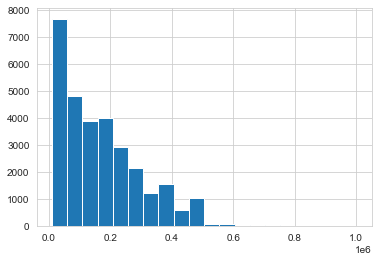

In [53]:
credit_card.LIMIT_BAL.hist(bins = 20)

In [54]:
credit_card.T

,0,1,2,3,4,5,6,7,8,9,...,29990,29991,29992,29993,29994,29995,29996,29997,29998,29999
LIMIT_BAL,20000.0,120000.0,90000.0,50000.0,50000.0,50000.0,500000.0,100000.0,140000.0,20000.0,...,140000.0,210000.0,10000.0,100000.0,80000.0,220000.0,150000.0,30000.0,80000.0,50000.0
SEX,2.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,2.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
EDUCATION,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,3.0,3.0,...,2.0,2.0,3.0,1.0,2.0,3.0,3.0,2.0,3.0,2.0
MARRIAGE,1.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,...,1.0,1.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0
AGE,24.0,26.0,34.0,37.0,57.0,37.0,29.0,23.0,28.0,35.0,...,41.0,34.0,43.0,38.0,34.0,39.0,43.0,37.0,41.0,46.0
PAY_1,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,0.0,0.0,2.0,0.0,0.0,4.0,1.0,0.0
PAY_2,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,2.0,0.0,0.0,3.0,0.0,0.0
PAY_3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,0.0,2.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0
PAY_4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
PAY_5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0


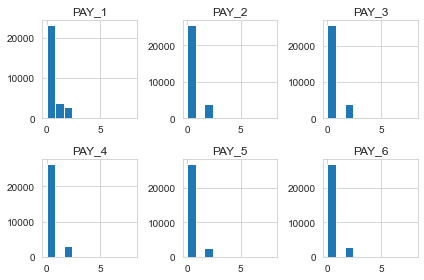

In [55]:
fil = (credit_card.PAY_1 == -2) | (credit_card.PAY_1 == -1) | (credit_card.PAY_1 == 0)
credit_card.loc[fil, 'PAY_1'] = 0
fil = (credit_card.PAY_2 == -2) | (credit_card.PAY_2 == -1) | (credit_card.PAY_2 == 0)
credit_card.loc[fil, 'PAY_2'] = 0
fil = (credit_card.PAY_3 == -2) | (credit_card.PAY_3 == -1) | (credit_card.PAY_3 == 0)
credit_card.loc[fil, 'PAY_3'] = 0
fil = (credit_card.PAY_4 == -2) | (credit_card.PAY_4 == -1) | (credit_card.PAY_4 == 0)
credit_card.loc[fil, 'PAY_4'] = 0
fil = (credit_card.PAY_5 == -2) | (credit_card.PAY_5 == -1) | (credit_card.PAY_5 == 0)
credit_card.loc[fil, 'PAY_5'] = 0
fil = (credit_card.PAY_6 == -2) | (credit_card.PAY_6 == -1) | (credit_card.PAY_6 == 0)
credit_card.loc[fil, 'PAY_6'] = 0
late = credit_card[['PAY_1','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]
draw_histograms(late, late.columns, 2, 3, 10)

In [56]:
pd.crosstab(credit_card.SEX, credit_card.def_pay)

def_pay,0,1
SEX,,
1,9015,2873
2,14349,3763


In [57]:
credit_card[["SEX", "def_pay"]].groupby(['SEX']).mean().sort_values(by='def_pay')

,def_pay
SEX,
2,0.207763
1,0.241672


In [58]:
def corr_2_cols(Col1, Col2):
    res = credit_card.groupby([Col1, Col2]).size().unstack()
    res['perc'] = (res[res.columns[1]]/(res[res.columns[0]] + res[res.columns[1]]))
    return res

In [59]:
credit_card.groupby(['SEX', 'def_pay']).size().unstack()

def_pay,0,1
SEX,,
1,9015,2873
2,14349,3763


In [60]:
corr_2_cols('EDUCATION', 'def_pay')

def_pay,0,1,perc
EDUCATION,,,
1,8549,2036,0.192348
2,10700,3330,0.237349
3,3680,1237,0.251576
4,435,33,0.070513


In [61]:
# correlation matrix
cor = credit_card.corr()
cor

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
LIMIT_BAL,1.000000,0.024755,-0.231088,-0.111012,0.144713,-0.170745,-0.197136,-0.191323,-0.180629,-0.170045,...,0.293988,0.295562,0.290389,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595,-0.153520
SEX,0.024755,1.000000,0.013627,-0.028522,-0.090874,-0.034475,-0.044750,-0.041227,-0.039737,-0.038533,...,-0.021880,-0.017005,-0.016733,-0.000242,-0.001391,-0.008597,-0.002229,-0.001667,-0.002766,-0.039961
EDUCATION,-0.231088,0.013627,1.000000,-0.136797,0.182434,0.055937,0.062739,0.053058,0.051209,0.039623,...,-0.006131,-0.012439,-0.012646,-0.041088,-0.032793,-0.044293,-0.040949,-0.045138,-0.044061,0.033842
MARRIAGE,-0.111012,-0.028522,-0.136797,1.000000,-0.412001,-0.011551,-0.009275,0.002556,-0.003029,-0.002497,...,-0.027274,-0.029270,-0.025066,-0.004653,-0.009513,-0.004250,-0.013970,-0.003019,-0.008383,-0.027575
AGE,0.144713,-0.090874,0.182434,-0.412001,1.000000,-0.001447,-0.008774,-0.014266,-0.007288,-0.013277,...,0.051353,0.049345,0.047613,0.026147,0.021785,0.029247,0.021379,0.022850,0.019478,0.013890
PAY_1,-0.170745,-0.034475,0.055937,-0.011551,-0.001447,1.000000,0.698389,0.516970,0.460224,0.424473,...,0.022100,0.030731,0.030201,-0.079177,-0.057189,-0.062620,-0.061886,-0.053784,-0.048733,0.396019
PAY_2,-0.197136,-0.044750,0.062739,-0.009275,-0.008774,0.698389,1.000000,0.663529,0.512773,0.462717,...,0.032467,0.040422,0.042222,-0.097475,-0.054838,-0.059865,-0.053981,-0.048714,-0.043099,0.327093
PAY_3,-0.191323,-0.041227,0.053058,0.002556,-0.014266,0.516970,0.663529,1.000000,0.678931,0.551430,...,0.016579,0.026196,0.028979,-0.039356,-0.073670,-0.057702,-0.053849,-0.050805,-0.048443,0.286999
PAY_4,-0.180629,-0.039737,0.051209,-0.003029,-0.007288,0.460224,0.512773,0.678931,1.000000,0.745419,...,0.014654,0.027239,0.033138,-0.054484,-0.036877,-0.074064,-0.055305,-0.052732,-0.048828,0.269055
PAY_5,-0.170045,-0.038533,0.039623,-0.002497,-0.013277,0.424473,0.462717,0.551430,0.745419,1.000000,...,0.024139,0.036216,0.042616,-0.053692,-0.039586,-0.037270,-0.065943,-0.051815,-0.046110,0.260850


In [62]:
credit_card

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
0,20000.0,2,2,1,24,2,2,0,0,0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,0,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,0,0,0,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,1,3,1,39,0,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,150000.0,1,3,2,43,0,0,0,0,0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,30000.0,1,2,2,37,4,3,2,0,0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,80000.0,1,3,1,41,1,0,0,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


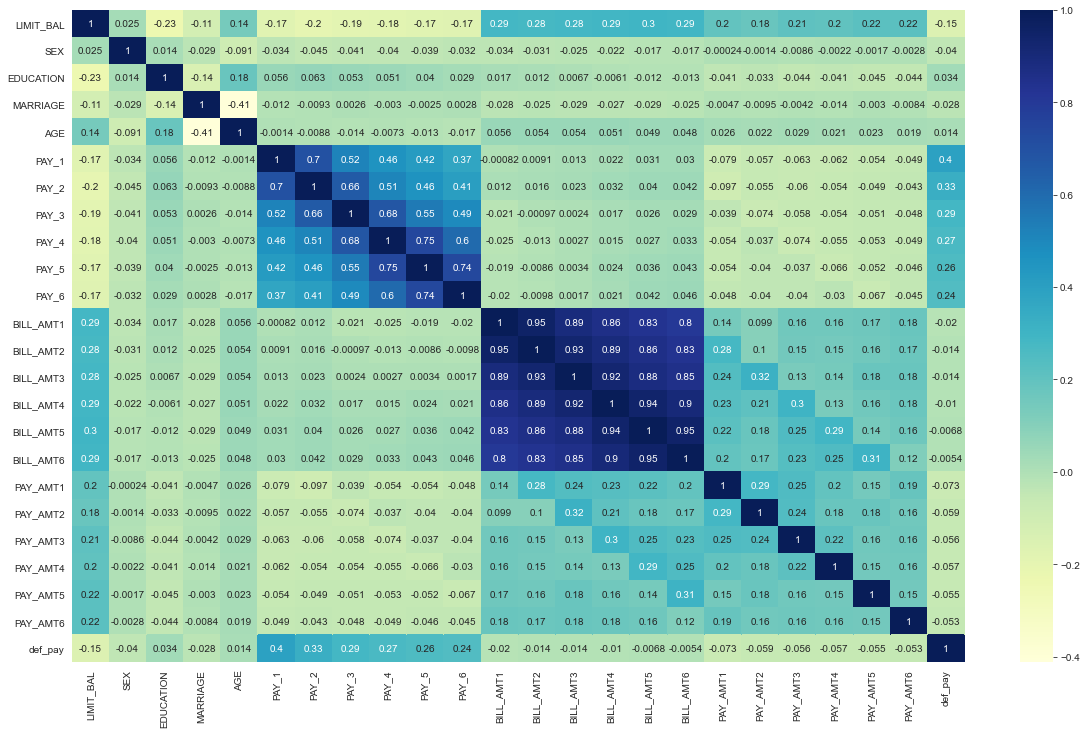

In [63]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(20,12))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

From above heat map we can conclude that Pay 1-6 and Bill amt 1-6 are having positive strog coorelation and other features are not much corelateed

In [64]:
credit_card.T

,0,1,2,3,4,5,6,7,8,9,...,29990,29991,29992,29993,29994,29995,29996,29997,29998,29999
LIMIT_BAL,20000.0,120000.0,90000.0,50000.0,50000.0,50000.0,500000.0,100000.0,140000.0,20000.0,...,140000.0,210000.0,10000.0,100000.0,80000.0,220000.0,150000.0,30000.0,80000.0,50000.0
SEX,2.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,2.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
EDUCATION,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,3.0,3.0,...,2.0,2.0,3.0,1.0,2.0,3.0,3.0,2.0,3.0,2.0
MARRIAGE,1.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,...,1.0,1.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0
AGE,24.0,26.0,34.0,37.0,57.0,37.0,29.0,23.0,28.0,35.0,...,41.0,34.0,43.0,38.0,34.0,39.0,43.0,37.0,41.0,46.0
PAY_1,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,0.0,0.0,2.0,0.0,0.0,4.0,1.0,0.0
PAY_2,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,2.0,0.0,0.0,3.0,0.0,0.0
PAY_3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,0.0,2.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0
PAY_4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
PAY_5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0


# Training  Model

In [65]:

from sklearn.model_selection import train_test_split
X = credit_card.drop(['def_pay'], axis=1)  
y = credit_card['def_pay']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, stratify=y, random_state=42)


In [66]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
LIMIT_BAL,24000.0,167364.666667,129511.313151,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,24000.0,1.604750,0.488915,1.0,1.00,2.0,2.00,2.0
EDUCATION,24000.0,1.842500,0.744625,1.0,1.00,2.0,2.00,4.0
MARRIAGE,24000.0,1.558750,0.521274,1.0,1.00,2.0,2.00,3.0
AGE,24000.0,35.432625,9.195256,21.0,28.00,34.0,41.00,75.0
PAY_1,24000.0,0.357667,0.760766,0.0,0.00,0.0,0.00,8.0
PAY_2,24000.0,0.320292,0.803523,0.0,0.00,0.0,0.00,8.0
PAY_3,24000.0,0.302792,0.787380,0.0,0.00,0.0,0.00,8.0
PAY_4,24000.0,0.257208,0.751383,0.0,0.00,0.0,0.00,8.0
PAY_5,24000.0,0.218625,0.705289,0.0,0.00,0.0,0.00,8.0


In [67]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)


In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,f1_score,roc_auc_score,roc_curve,accuracy_score
from sklearn.model_selection import cross_val_score
LR = LogisticRegression(random_state=0,solver="liblinear")
LR.fit(X_train_std, y_train)
y_pred = LR.predict(X_test_std)
print('Accuracy:', accuracy_score(y_pred,y_test))
print('confusion matrix-test\n',confusion_matrix(y_pred,y_test))
cv_scores = cross_val_score(LR, X, y, cv=5)
print()
print(classification_report(y_test, y_pred))
print()
print("Average 5-Fold CV Score: {}".format(round(np.mean(cv_scores),4)),
      ", Standard deviation: {}".format(round(np.std(cv_scores),4)))

Accuracy: 0.815
confusion matrix-test
 [[4453  890]
 [ 220  437]]

              precision    recall  f1-score   support

           0       0.83      0.95      0.89      4673
           1       0.67      0.33      0.44      1327

    accuracy                           0.81      6000
   macro avg       0.75      0.64      0.66      6000
weighted avg       0.80      0.81      0.79      6000


Average 5-Fold CV Score: 0.7787 , Standard deviation: 0.0002


In [69]:
# create the training df by remerging X_train and y_train
credit_card_train = X_train.join(y_train)
credit_card_train.sample(10)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
17828,50000.0,1,1,2,25,0,0,0,0,0,...,43451.0,19790.0,17790.0,1845.0,1967.0,1400.0,396.0,0.0,0.0,0
17888,240000.0,1,2,1,33,1,2,2,0,0,...,39578.0,46489.0,45632.0,6765.0,0.0,2000.0,7592.0,0.0,140000.0,0
23802,30000.0,2,3,1,67,2,2,0,0,0,...,27529.0,24909.0,24576.0,0.0,1800.0,1370.0,1264.0,2078.0,836.0,1
14687,50000.0,1,1,2,57,0,0,0,0,0,...,20155.0,19959.0,20194.0,2100.0,1320.0,704.0,716.0,733.0,702.0,0
1863,50000.0,2,2,2,24,0,0,0,0,0,...,17401.0,19820.0,17399.0,1672.0,1246.0,574.0,3000.0,649.0,285.0,0
27057,100000.0,1,1,1,38,0,0,0,0,0,...,51400.0,0.0,0.0,2500.0,2500.0,3000.0,0.0,0.0,0.0,1
13321,70000.0,2,1,2,27,0,0,0,0,0,...,68922.0,1223.0,70027.0,5000.0,1900.0,2000.0,1223.0,70027.0,2600.0,0
12943,70000.0,2,2,2,30,0,0,0,0,0,...,10298.0,10511.0,9764.0,1162.0,1151.0,500.0,513.0,424.0,195.0,0
9711,50000.0,2,2,1,54,0,0,0,0,0,...,18264.0,18659.0,18918.0,2020.0,3128.0,1000.0,656.0,645.0,630.0,0
1809,500000.0,2,1,2,46,0,0,0,0,0,...,104734.0,41018.0,6258.0,163500.0,70160.0,104734.0,41018.0,6258.0,70356.0,0


In [70]:
from sklearn.utils import resample

# Separate majority and minority classes
credit_card_majority = credit_card_train[credit_card_train.def_pay==0]
credit_card_minority = credit_card_train[credit_card_train.def_pay==1]

print(credit_card_majority.def_pay.count())
print("-----------")
print(credit_card_minority.def_pay.count())
print("-----------")
print(credit_card_train.def_pay.value_counts())

18691
-----------
5309
-----------
0    18691
1     5309
Name: def_pay, dtype: int64


In [71]:
# Upsample minority class
credit_card_minority_upsampled = resample(credit_card_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=18691,    # to match majority class
                                 random_state=587) # reproducible results
# Combine majority class with upsampled minority class
credit_card_upsampled = pd.concat([credit_card_majority, credit_card_minority_upsampled])
# Display new class counts
credit_card_upsampled.def_pay.value_counts()

0    18691
1    18691
Name: def_pay, dtype: int64

In [72]:
# Downsample majority class
credit_card_majority_downsampled = resample(credit_card_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=5309,     # to match minority class
                                 random_state=24) # reproducible results
# Combine minority class with downsampled majority class
credit_card_downsampled = pd.concat([credit_card_majority_downsampled, credit_card_minority])
# Display new class counts
credit_card_downsampled.def_pay.value_counts()

0    5309
1    5309
Name: def_pay, dtype: int64

In [73]:
import imblearn
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=587)
X_SMOTE, y_SMOTE = sm.fit_resample(X_train, y_train)
print(len(y_SMOTE))
print(y_SMOTE.sum())
print(y_SMOTE.value_counts())

37382
18691
0    18691
1    18691
Name: def_pay, dtype: int64


In [134]:
!pip install xgboost


In [75]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

In [76]:
# normal training set
param_grid = {'n_estimators': [200, 400, 600, 1000], # It is going to be a long search
              'criterion': ['entropy', 'gini'],
              'class_weight' : ['balanced'], 'n_jobs' : [-1]} #use all the computational power you have
acc_scorer = make_scorer(f1_score)
grid_forest = GridSearchCV(RandomForestClassifier(), param_grid, scoring = acc_scorer, cv=5)
%time grid_forest = grid_forest.fit(X_train, y_train)
print(grid_forest.best_estimator_)
print(grid_forest.best_score_)
forest_normal = grid_forest.best_estimator_

Wall time: 20min 56s
RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       n_estimators=600, n_jobs=-1)
0.4684808013379233


In [77]:
forest_normal = RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='entropy', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=1000, n_jobs=-1, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [78]:
y_upsampled = credit_card_upsampled.def_pay
X_upsampled = credit_card_upsampled.drop(['def_pay'], axis= 1)

In [79]:
# upsampled training set
param_grid = {'n_estimators': [200, 400, 600, 1000],
              'criterion': ['entropy', 'gini'], 'n_jobs' : [-1]}
acc_scorer = make_scorer(f1_score)
grid_forest = GridSearchCV(RandomForestClassifier(), param_grid, scoring = acc_scorer, cv=5)
%time grid_forest = grid_forest.fit(X_upsampled, y_upsampled)
print(grid_forest.best_estimator_)
print(grid_forest.best_score_)
forest_upsampled = grid_forest.best_estimator_

Wall time: 28min
RandomForestClassifier(n_estimators=600, n_jobs=-1)
0.9393259808625437


In [80]:
forest_upsampled = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [81]:
y_downsampled = credit_card_downsampled.def_pay
X_downsampled = credit_card_downsampled.drop(['def_pay'], axis = 1)

In [82]:
# downsampled training set
param_grid = {'n_estimators': [200, 400, 600, 1000],
              'criterion': ['entropy', 'gini']}
acc_scorer = make_scorer(f1_score)
grid_forest = GridSearchCV(RandomForestClassifier(), param_grid, scoring = acc_scorer, cv=5,verbose = 1,n_jobs = -1)
%time grid_forest = grid_forest.fit(X_downsampled, y_downsampled)
print(grid_forest.best_estimator_)
print(grid_forest.best_score_)
forest_downsampled = grid_forest.best_estimator_

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Wall time: 8min 8s
RandomForestClassifier(n_estimators=400)
0.6891635174086519


In [83]:
forest_downsampled = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [84]:
# SMOTE training set
param_grid = {'n_estimators': [200, 400, 600, 1000],
              'criterion': ['entropy', 'gini']}
acc_scorer = make_scorer(f1_score)
grid_forest = GridSearchCV(RandomForestClassifier(), param_grid, scoring = acc_scorer, cv=5,verbose = 1,n_jobs = -1)
%time grid_forest = grid_forest.fit(X_SMOTE, y_SMOTE)
print(grid_forest.best_estimator_)
print(grid_forest.best_score_)
forest_SMOTE = grid_forest.best_estimator_

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Wall time: 32min 22s
RandomForestClassifier(n_estimators=1000)
0.8308006669023186


In [85]:
print(grid_forest.best_estimator_)

RandomForestClassifier(n_estimators=1000)


In [86]:
forest_SMOTE = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [87]:
## Adaboost

# normal training set
param_grid = {'n_estimators': [200,300],
              'algorithm': ['SAMME', 'SAMME.R'],
              'learning_rate' : [0.5, 0.75, 1.0]}
acc_scorer = make_scorer(f1_score)
grid_ada = GridSearchCV(AdaBoostClassifier(DecisionTreeClassifier()), 
                        param_grid, scoring = acc_scorer, cv=5,verbose = 1,n_jobs = -1)
%time grid_ada = grid_ada.fit(X_train, y_train)
print(grid_ada.best_estimator_)
print(grid_ada.best_score_)
ada_normal = grid_ada.best_estimator_

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Wall time: 54min 32s
AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), learning_rate=0.75,
                   n_estimators=200)
0.4326253834905023


In [88]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier

In [89]:
!pip install scikit-learn

In [ ]:
ada_normal = AdaBoostClassifier(algorithm='SAMME',
          base_estimator=DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, random_state=None,
            splitter='best'),
          learning_rate=0.75, n_estimators=300, random_state=None)

In [93]:
# upsampled training set
param_grid = {'n_estimators': [200,300],
              'algorithm': ['SAMME', 'SAMME.R'],
              'learning_rate' : [0.5, 0.75, 1.0]}
acc_scorer = make_scorer(f1_score)
grid_ada = GridSearchCV(AdaBoostClassifier(), param_grid, scoring = acc_scorer, cv=5,verbose = 1,n_jobs = -1)
%time grid_ada = grid_ada.fit(X_upsampled, y_upsampled)
print(grid_ada.best_estimator_)
print(grid_ada.best_score_)
ada_upsampled = grid_ada.best_estimator_

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Wall time: 5min 24s
AdaBoostClassifier(n_estimators=300)
0.69208801355682


In [94]:
ada_upsampled = AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=300, random_state=None)

In [95]:
# downsampled training set
param_grid = {'n_estimators': [200,300],
              'algorithm': ['SAMME', 'SAMME.R'],
              'learning_rate' : [0.5, 0.75, 1.0]}
acc_scorer = make_scorer(f1_score)
grid_ada = GridSearchCV(AdaBoostClassifier(), param_grid, scoring = acc_scorer, cv=5,verbose = 1,n_jobs = -1)
%time grid_ada = grid_ada.fit(X_downsampled, y_downsampled)
print(grid_ada.best_estimator_)
print(grid_ada.best_score_)
ada_downsampled = grid_ada.best_estimator_

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Wall time: 1min 31s
AdaBoostClassifier(n_estimators=300)
0.6804438041263573


In [96]:
ada_downsampled = AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=200, random_state=None)

In [97]:
# SMOTE training set
param_grid = {'n_estimators': [200,300],
              'algorithm': ['SAMME', 'SAMME.R'],
              'learning_rate' : [0.5, 0.75, 1.0]}
acc_scorer = make_scorer(f1_score)
grid_ada = GridSearchCV(AdaBoostClassifier(), param_grid, scoring = acc_scorer, cv=5,verbose = 1,n_jobs = -1)
%time grid_ada = grid_ada.fit(X_SMOTE, y_SMOTE)
print(grid_ada.best_estimator_)
print(grid_ada.best_score_)
ada_SMOTE = grid_ada.best_estimator_

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Wall time: 7min 31s
AdaBoostClassifier(n_estimators=300)
0.7418406514906074


In [98]:
ada_SMOTE = AdaBoostClassifier(algorithm='SAMME', base_estimator=None, learning_rate=0.5,
          n_estimators=200, random_state=None)


In [99]:
## Gradient Boosting

# normal training set
param_grid = {'n_estimators': [200,300],
              'learning_rate' : [0.5, 0.75, 1.0]}
acc_scorer = make_scorer(f1_score)
grid_gbc = GridSearchCV(GradientBoostingClassifier(), param_grid, scoring = acc_scorer, cv=5,verbose = 1,n_jobs = -1)
%time grid_gbc = grid_gbc.fit(X_train, y_train)
print(grid_gbc.best_estimator_)
print(grid_gbc.best_score_)
gbc_normal = grid_gbc.best_estimator_

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Wall time: 4min 45s
GradientBoostingClassifier(learning_rate=0.5, n_estimators=200)
0.45400929633716086


In [116]:
gbc_normal = GradientBoostingClassifier(criterion='friedman_mse',
              learning_rate=0.5, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=200,
              random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [117]:
#upsampled training set
param_grid = {'n_estimators': [200,300],
              'learning_rate' : [0.5, 0.75, 1.0]}
acc_scorer = make_scorer(f1_score)
grid_gbc = GridSearchCV(GradientBoostingClassifier(), param_grid, scoring = acc_scorer, cv=5,verbose = 1,n_jobs = -1)
%time grid_gbc = grid_gbc.fit(X_upsampled, y_upsampled)
print(grid_gbc.best_estimator_)
print(grid_gbc.best_score_)
gbc_upsampled = grid_gbc.best_estimator_

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Wall time: 6min 12s
GradientBoostingClassifier(learning_rate=1.0, n_estimators=300)
0.8236193784860941


In [118]:
gbc_upsampled = GradientBoostingClassifier(criterion='friedman_mse',
              learning_rate=1.0, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=300,
              random_state=None, subsample=1.0, verbose=0,
              warm_start=False)


In [119]:
#downsampled training set
param_grid = {'n_estimators': [200,300],
              'learning_rate' : [0.5, 0.75, 1.0]}
acc_scorer = make_scorer(f1_score)
grid_gbc = GridSearchCV(GradientBoostingClassifier(), param_grid, scoring = acc_scorer, cv=5,verbose = 1,n_jobs = -1)
%time grid_gbc = grid_gbc.fit(X_downsampled, y_downsampled)
print(grid_gbc.best_estimator_)
print(grid_gbc.best_score_)
gbc_downsampled = grid_gbc.best_estimator_

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Wall time: 1min 33s
GradientBoostingClassifier(learning_rate=0.5, n_estimators=300)
0.6833242208186536


In [120]:
gbc_downsampled = GradientBoostingClassifier(criterion='friedman_mse', 
              learning_rate=0.5, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=300,
              random_state=None, subsample=1.0, verbose=0,
              warm_start=False)


In [121]:
#SMOTE training set
param_grid = {'n_estimators': [200,300],
              'learning_rate' : [0.5, 0.75, 1.0]}
acc_scorer = make_scorer(f1_score)
grid_gbc = GridSearchCV(GradientBoostingClassifier(), param_grid, scoring = acc_scorer, cv=5,verbose = 1,n_jobs = -1)
%time grid_gbc = grid_gbc.fit(X_SMOTE, y_SMOTE)
print(grid_gbc.best_estimator_)
print(grid_gbc.best_score_)
gbc_SMOTE = grid_gbc.best_estimator_

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Wall time: 7min 25s
GradientBoostingClassifier(learning_rate=0.5, n_estimators=300)
0.7748594599683821


In [122]:
gbc_SMOTE = GradientBoostingClassifier(criterion='friedman_mse',
              learning_rate=0.5, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=200,
              random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [136]:
from xgboost import XGBClassifier


In [137]:
# Normal sample training
%time xgb_downsampled.fit(X_train, y_train)
predictions = xgb_downsampled.predict(X_test)
print("-------------")
print("f1 score: {}".format(round(f1_score(y_true = y_test, y_pred = predictions),3)))
print("Accuracy: {}".format(round(accuracy_score(y_true = y_test, y_pred = predictions),3)))
print("-------------")
TP = np.sum(np.logical_and(predictions == 1, y_test == 1))
TN = np.sum(np.logical_and(predictions == 0, y_test == 0))
FP = np.sum(np.logical_and(predictions == 1, y_test == 0))
FN = np.sum(np.logical_and(predictions == 0, y_test == 1))
pred = len(predictions)

print('True Positives: {}'.format(TP))
print('False Positive: {}'.format(FP))
print('True Negative: {}'.format(TN))
print('False Negative: {}'.format(FN))
print('Precision: {}'.format(round(TP/(TP+FP),2)))
print('Recall: {}'.format(round(TP/(TP+FN),2)))

[00:23:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Wall time: 2.42 s
-------------
f1 score: 0.474
Accuracy: 0.819
-------------
True Positives: 490
False Positive: 249
True Negative: 4424
False Negative: 837
Precision: 0.66
Recall: 0.37


In [138]:
# Upsample training
%time xgb_downsampled.fit(X_upsampled, y_upsampled)
predictions = xgb_downsampled.predict(X_test)
print("-------------")
print("f1 score: {}".format(round(f1_score(y_true = y_test, y_pred = predictions),3)))
print("Accuracy: {}".format(round(accuracy_score(y_true = y_test, y_pred = predictions),3)))
print("-------------")
TP = np.sum(np.logical_and(predictions == 1, y_test == 1))
TN = np.sum(np.logical_and(predictions == 0, y_test == 0))
FP = np.sum(np.logical_and(predictions == 1, y_test == 0))
FN = np.sum(np.logical_and(predictions == 0, y_test == 1))
pred = len(predictions)

print('True Positives: {}'.format(TP))
print('False Positive: {}'.format(FP))
print('True Negative: {}'.format(TN))
print('False Negative: {}'.format(FN))
print('Precision: {}'.format(round(TP/(TP+FP),2)))
print('Recall: {}'.format(round(TP/(TP+FN),2)))

[00:23:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Akarsh Srivastava\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Wall time: 3.35 s
-------------
f1 score: 0.538
Accuracy: 0.765
-------------
True Positives: 820
False Positive: 904
True Negative: 3769
False Negative: 507
Precision: 0.48
Recall: 0.62


In [139]:
# Downsample training
%time forest_downsampled.fit(X_downsampled, y_downsampled)
predictions = forest_downsampled.predict(X_test)
print("-------------")
print("f1 score: {}".format(round(f1_score(y_true = y_test, y_pred = predictions),3)))
print("Accuracy: {}".format(round(accuracy_score(y_true = y_test, y_pred = predictions),3)))
print("-------------")
TP = np.sum(np.logical_and(predictions == 1, y_test == 1))
TN = np.sum(np.logical_and(predictions == 0, y_test == 0))
FP = np.sum(np.logical_and(predictions == 1, y_test == 0))
FN = np.sum(np.logical_and(predictions == 0, y_test == 1))
pred = len(predictions)

print('True Positives: {}'.format(TP))
print('False Positive: {}'.format(FP))
print('True Negative: {}'.format(TN))
print('False Negative: {}'.format(FN))
print('Precision: {}'.format(round(TP/(TP+FP),2)))
print('Recall: {}'.format(round(TP/(TP+FN),2)))

Wall time: 10.9 s
-------------
f1 score: 0.514
Accuracy: 0.739
-------------
True Positives: 829
False Positive: 1068
True Negative: 3605
False Negative: 498
Precision: 0.44
Recall: 0.62


In [140]:
# SMOTE training
%time xgb_downsampled.fit(X_SMOTE, y_SMOTE)
predictions = xgb_downsampled.predict(X_test)
print("-------------")
print("f1 score: {}".format(round(f1_score(y_true = y_test, y_pred = predictions),3)))
print("Accuracy: {}".format(round(accuracy_score(y_true = y_test, y_pred = predictions),3)))
print("-------------")
TP = np.sum(np.logical_and(predictions == 1, y_test == 1))
TN = np.sum(np.logical_and(predictions == 0, y_test == 0))
FP = np.sum(np.logical_and(predictions == 1, y_test == 0))
FN = np.sum(np.logical_and(predictions == 0, y_test == 1))
pred = len(predictions)

print('True Positives: {}'.format(TP))
print('False Positive: {}'.format(FP))
print('True Negative: {}'.format(TN))
print('False Negative: {}'.format(FN))
print('Precision: {}'.format(round(TP/(TP+FP),2)))
print('Recall: {}'.format(round(TP/(TP+FN),2)))

[00:23:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Akarsh Srivastava\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Wall time: 5.01 s
-------------
f1 score: 0.498
Accuracy: 0.76
-------------
True Positives: 715
False Positive: 827
True Negative: 3846
False Negative: 612
Precision: 0.46
Recall: 0.54


In [141]:
def hyperParameterTuning(X_downsampled, y_downsampled):
    param_tuning = {
        'learning_rate': [0.01, 0.1,0.3],
        'max_depth': [3, 5, 7, 10],
        #'min_child_weight': [1, 3, 5],
        'subsample': [0.5, 0.7,1],
        'colsample_bytree': [0.5, 0.7],
        'n_estimators' : [100, 200, 500],
    }

    xgb_model = XGBClassifier()
    acc_scorer = make_scorer(f1_score)

    gsearch = GridSearchCV(estimator = xgb_model,
                           param_grid = param_tuning,                        
                           scoring = acc_scorer,  
                           cv = 5,
                           verbose = 2,
                           n_jobs = -1
                          )

    gsearch.fit(X_downsampled,y_downsampled)

    return gsearch.best_params_

In [ ]:
hyperParameterTuning(X_downsampled, y_downsampled)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


In [ ]:
xgb_downsampled = XGBClassifier(
        colsample_bytree = 0.5,
        learning_rate = 0.1,
        max_depth = 3,
        n_estimators = 200,
        subsample = 1)

In [ ]:
list(X_downsampled.columns.values.tolist()) 

In [ ]:
importances = forest_downsampled.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest_downsampled.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
print("Feature ranking:")

for f in range(X_downsampled.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))